<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Normality%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:39:14 Starting...
16:39:14 Installing yfinance into Google notebook...
16:39:18 Installing arch into Google notebook...
16:39:26 Initialized.


In [88]:
from scipy.stats import norm,gennorm,normaltest as normal_test
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(half,four,0.1)))))
results.index.names=["Sample","Beta"]

for n,beta in tqdm(results.index):
    sample=pd.Series(gennorm(beta,zero,one).rvs(n))
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"Normal Test"]=normal_test((sample-sample.mean())/sample.std())[1]

for alpha in 0.05,0.01,0.001:
    results["NT %g" % (alpha*hundred)]=results["Normal Test"]<alpha

display(results)

  0%|          | 0/34685 [00:00<?, ?it/s]

Mean    St.Dev.  Skewness  Kurtosis       JB Test  JB 5%  \
Sample Beta                                                                 
10     0.5  -1.158860  12.488771 -0.166600  2.324047  8.221862e-01  False   
       0.6  -2.589754   9.155896 -0.257572  2.470528  8.285705e-01  False   
       0.7   0.936398   8.738133  1.545752  6.282375  1.696343e-01  False   
       0.8  -0.695721   3.645722  1.172578  6.098990  3.267548e-01  False   
       0.9   0.168844   0.726370  1.001886  2.945372  5.147700e-01  False   
...               ...        ...       ...       ...           ...    ...   
1000   3.5  -0.001176   0.372180  0.044922  2.214472  2.064039e-06   True   
       3.6  -0.012636   0.345031  0.032492  2.178094  6.632891e-07   True   
       3.7   0.005094   0.329581 -0.032820  2.313231  4.589712e-05   True   
       3.8   0.004447   0.331571  0.060136  2.347065  9.546647e-05   True   
       3.9   0.007760   0.336150 -0.067597  2.269607  9.490493e-06   True   

             JB 1%  JB 0.1%  
Sample Beta                  
10     0.5   False    False  
       0.6   False    False  
       0.7   False    False  
       0.8   False    False  
       0.9   False    False  
...            ...      ...  
1000   3.5    True     True  
       3.6    True     True  
       3.7    True     True  
       3.8    True     True  
       3.9    True     True  

[34685 rows x 8 columns]

18:59:26 Displaying F.P.R. with Gaussian Filter sigma=0.


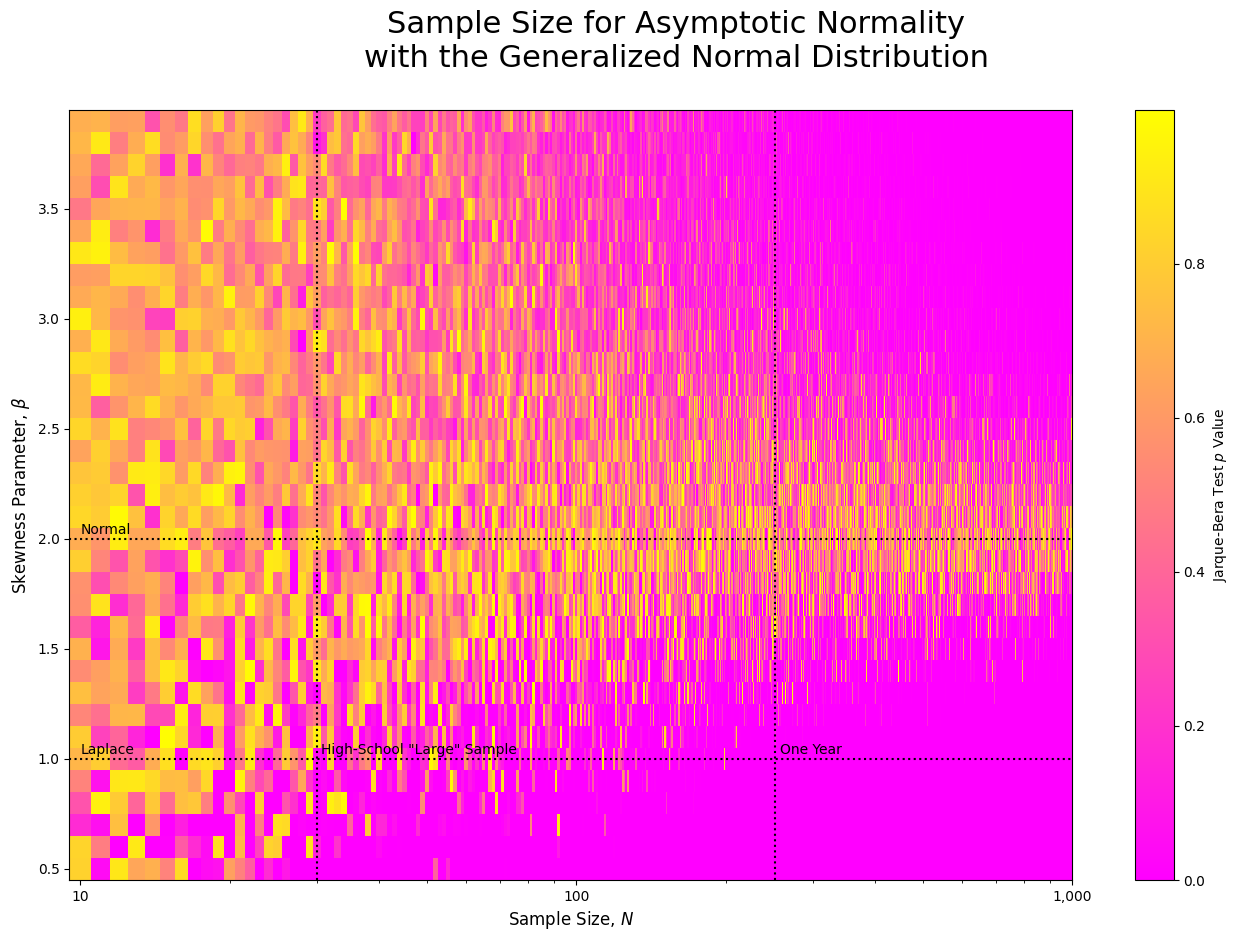

In [102]:
from scipy.ndimage import gaussian_filter
nprint("Displaying F.P.R. with Gaussian Filter sigma=%g." % (sigma:=zero))

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Sample",values="JB Test").values
X,Y=np.meshgrid(np.sort(df["Sample"].unique()),np.sort(df["Beta"].unique()))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
mesh=plot.pcolormesh(X,Y,gaussian_filter(Z,sigma) if sigma else Z,cmap='spring')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.set_xlabel("Sample Size, $N$",fontsize=12)
plot.set_ylabel("Skewness Parameter, $\\beta$",fontsize=12)
figure.suptitle(title:="Sample Size for Asymptotic Normality\nwith the Generalized Normal Distribution",fontsize=22)

for y,t in (two,"Normal"),(one,"Laplace"):
    plot.axhline(y,color=(c:='black'),linestyle=':')
    plot.text(X.min(),y+0.01,t,color=c,ha='left',va='bottom')

for x,t in (30,'High-School "Large" Sample'),(252,'One Year'):
    plot.axvline(x,color=c,linestyle=':')
    plot.text(x*1.02,y+0.01,t,color=c,ha='left',va='bottom')

figure.colorbar(mesh,ax=plot,label='Jarque-Bera Test $p$ Value')
figure.savefig(title.split("\n")[0]+".png",dpi=300,bbox_inches='tight')